In [1]:
!pip install fpl
import pandas as pd
import torch
import numpy as np
import random
from random import shuffle
np.random.seed(17)
random.seed(17)
torch.manual_seed(17)
import wget
import os
import aiohttp
import asyncio
from fpl import FPL
from torch.utils.data import TensorDataset, DataLoader
from player import Player
from team import Team
from data_processor import get_fpl, get_current_squad
from agent import Agent

In [2]:
opponent_feature_names = ["npxG","npxGA"]
player_feature_names = ["total_points", "ict_index", "clean_sheets", "saves", "assists"]

agent = Agent(player_feature_names, opponent_feature_names, model_path="./trained_models/player_oppponent_linear_score_model.pt")
await agent.get_data()
await agent.update_model()

/home/ajrfhp/anaconda3/envs/control/lib/python3.8/site-packages/pandas/core/frame.py:5171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
/home/ajrfhp/Control/Control_FPL/data_processor.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_player_features["total_points"] = all_player_features["total_points"].clip(0, max_player_points)


(0.7792297902868783, tensor(0.4525, grad_fn=<DivBackward0>))


Player out Keinan Davis. To double trade  = False 


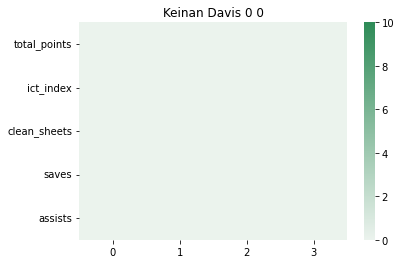

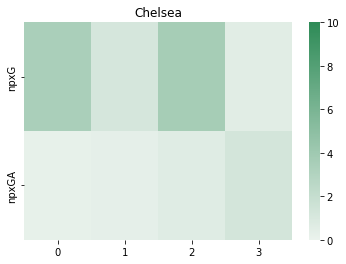

Player in Gabriel Fernando de Jesus. To double trade  = False 


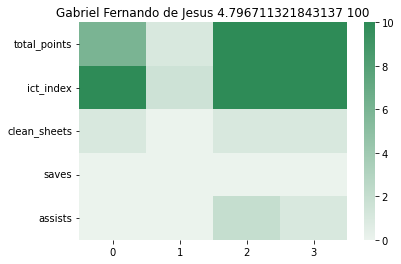

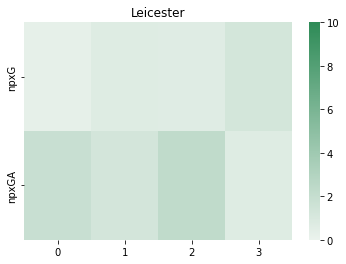

Ederson Santana de Moraes
Rúben Santos Gato Alves Dias
Oleksandr Zinchenko
Luke Shaw
Shane Duffy
Mohamed Salah
Sadio Mané
Pablo Fornals
Nicolas Pépé
Michail Antonio
Troy Deeney
Jed Steer
Mohamed Naser El Sayed Elneny
Javier Manquillo
Gabriel Fernando de Jesus
Ederson Santana de Moraes


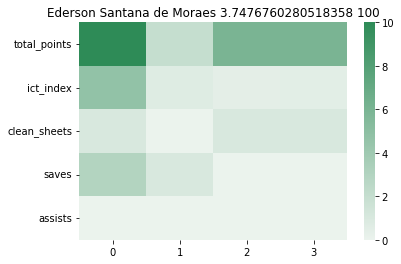

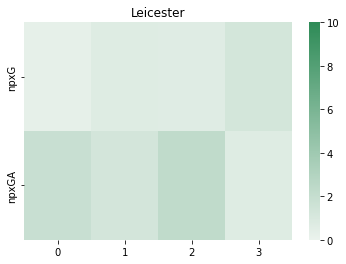

Rúben Santos Gato Alves Dias


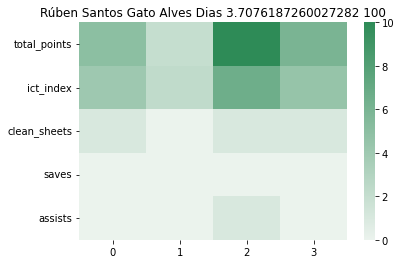

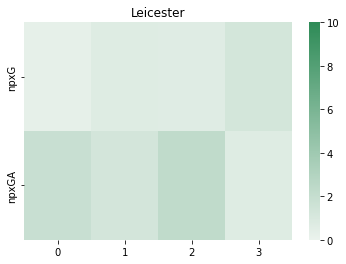

Luke Shaw


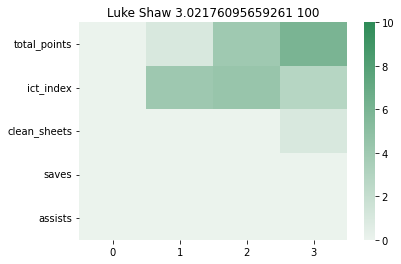

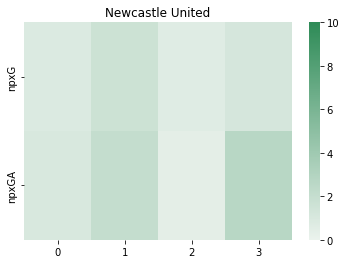

Oleksandr Zinchenko


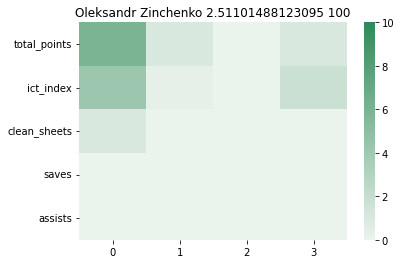

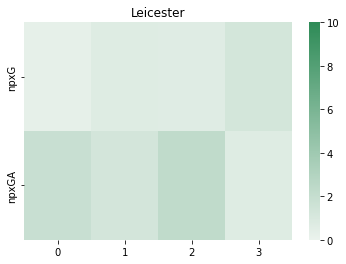

Mohamed Salah


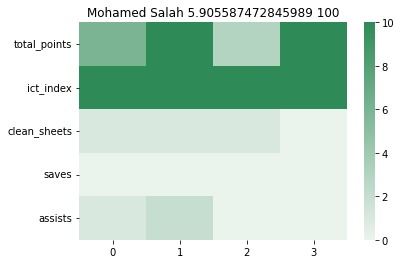

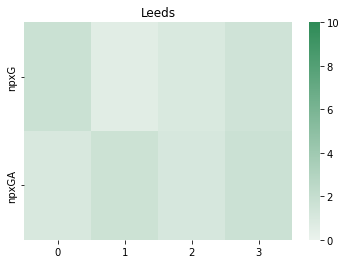

Sadio Mané


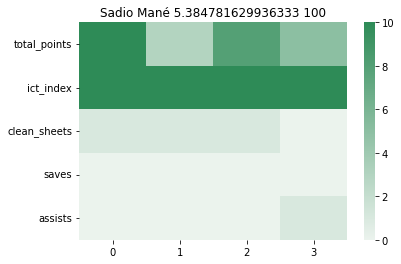

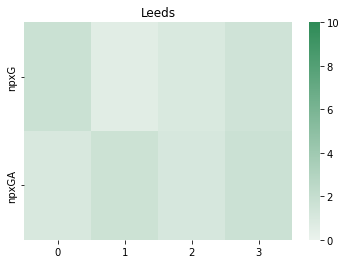

Pablo Fornals


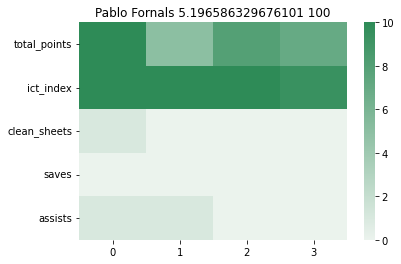

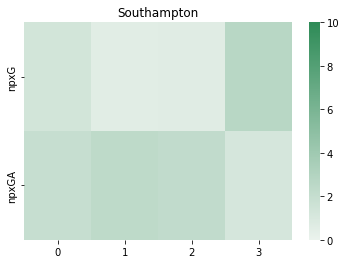

Nicolas Pépé


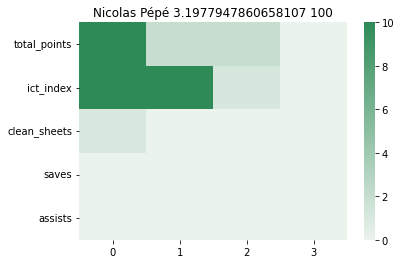

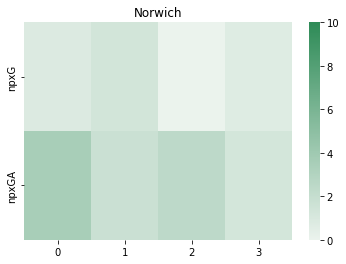

Michail Antonio


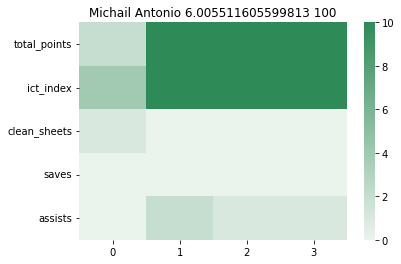

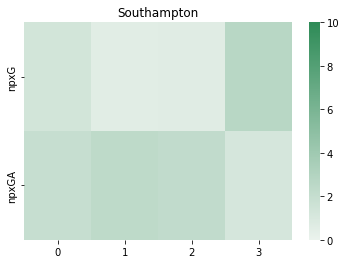

Gabriel Fernando de Jesus


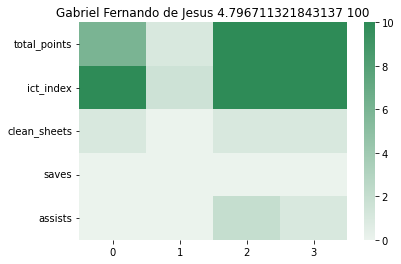

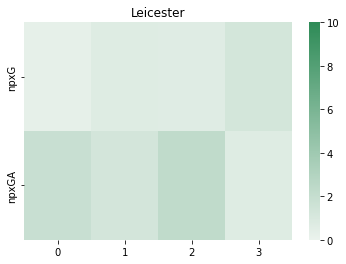

Troy Deeney


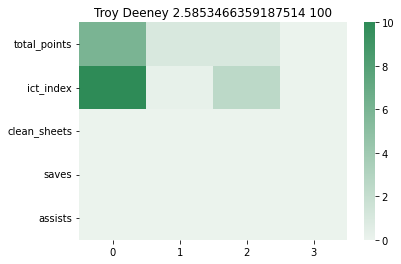

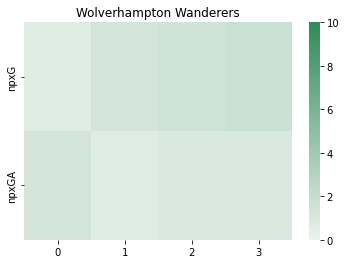

In [3]:
current_squad, non_squad = await agent.get_new_squad(player_feature_names, opponent_feature_names)
agent.set_playing_11(current_squad, visualize=True)





Goalkeeper
Hugo Lloris


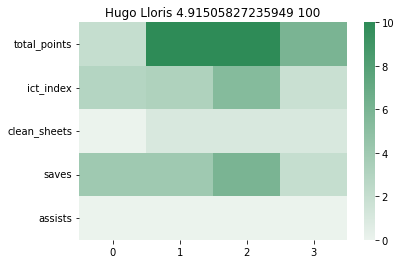

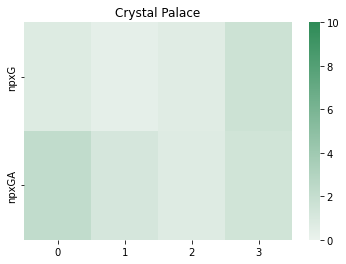

Alisson Ramses Becker


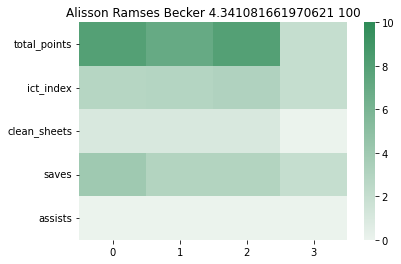

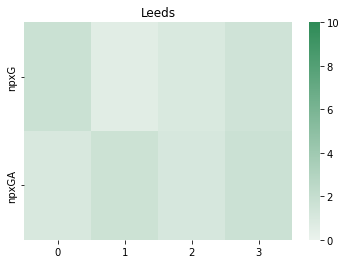

Edouard Mendy


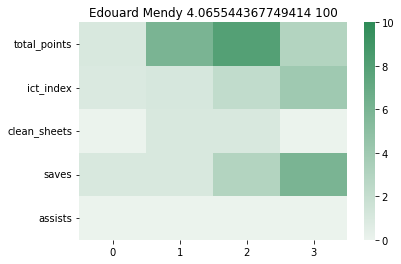

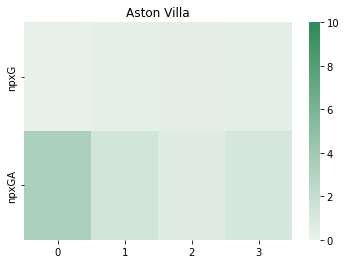

Jordan Pickford


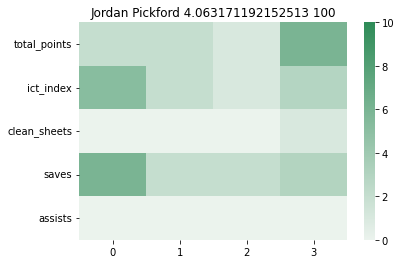

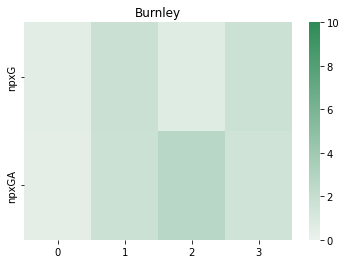

Emiliano Martínez


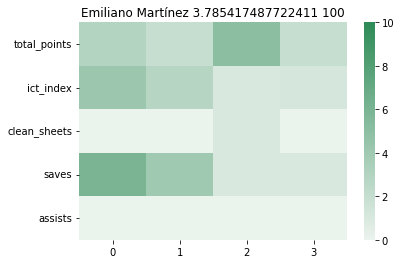

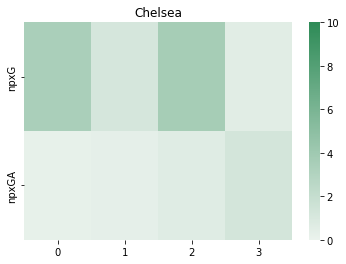










Defender
Trent Alexander-Arnold


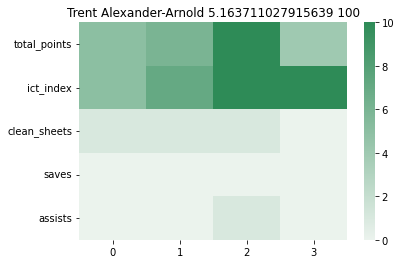

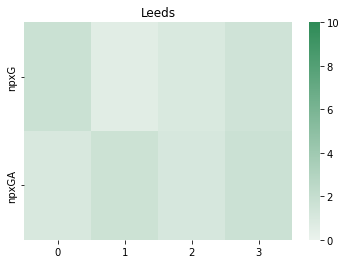

Marcos Alonso


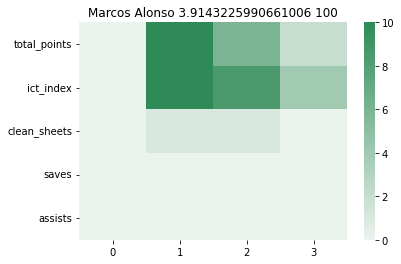

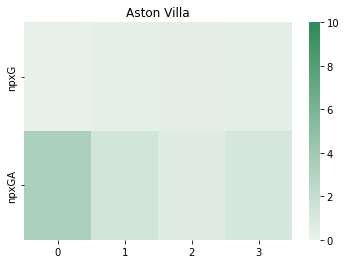

Aymeric Laporte


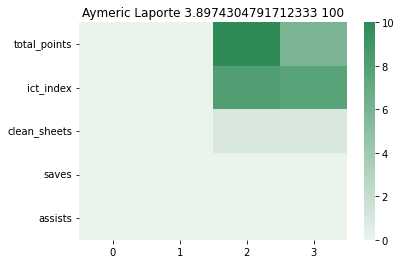

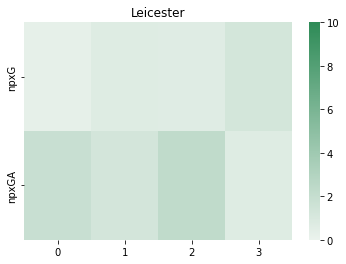

Japhet Tanganga


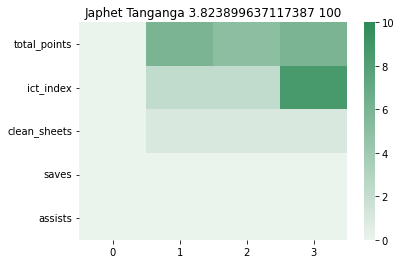

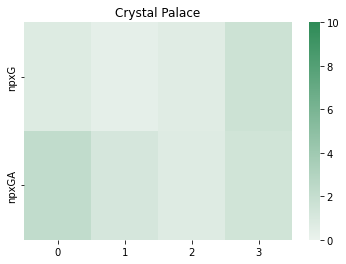

Sergio Reguilón


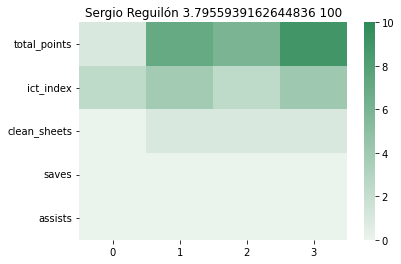

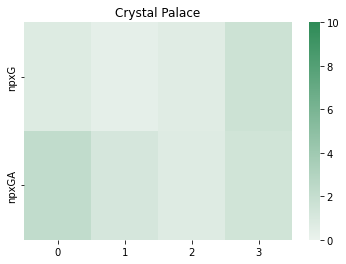










Midfielder
Mohamed Salah


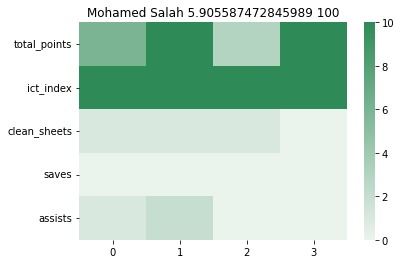

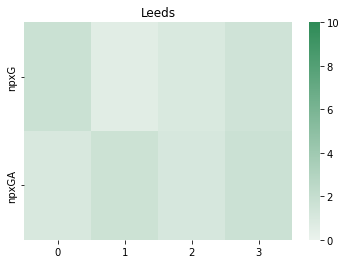

Sadio Mané


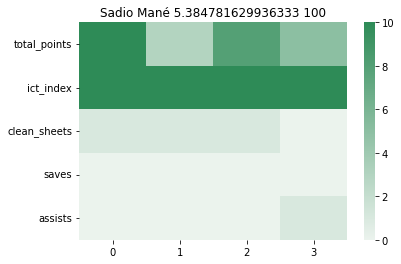

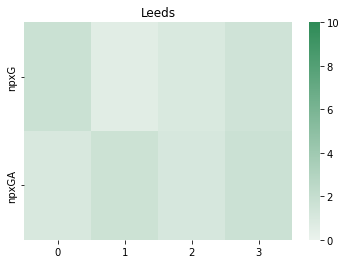

Pablo Fornals


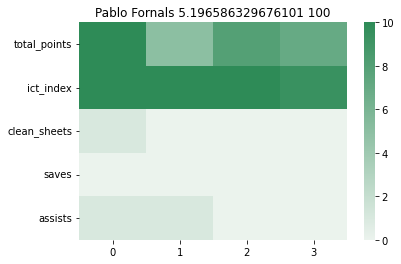

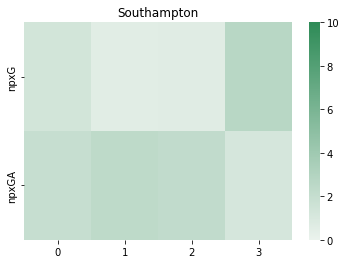

Heung-Min Son


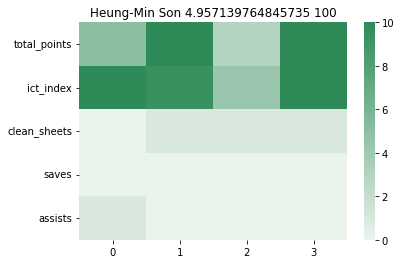

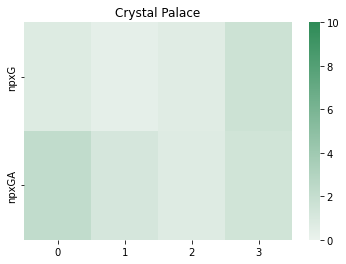

Jack Grealish


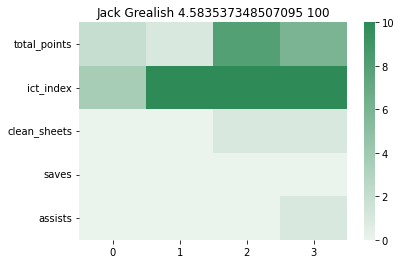

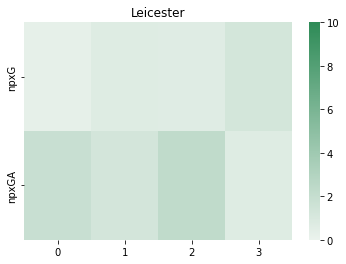










Forward
Michail Antonio


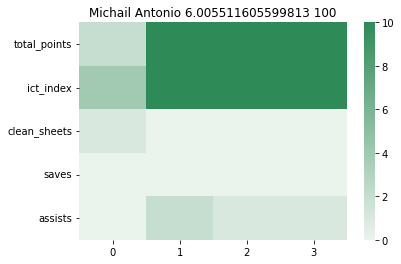

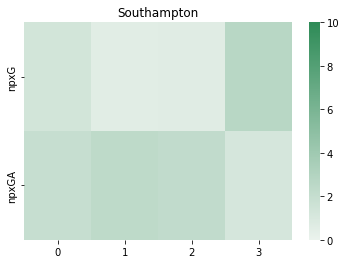

Gabriel Fernando de Jesus


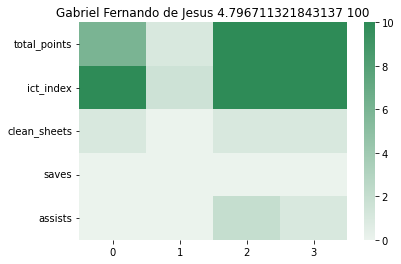

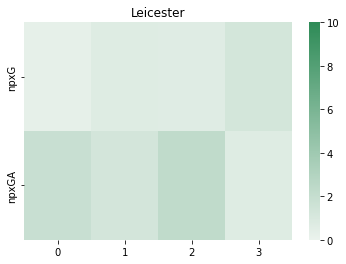

Dominic Calvert-Lewin


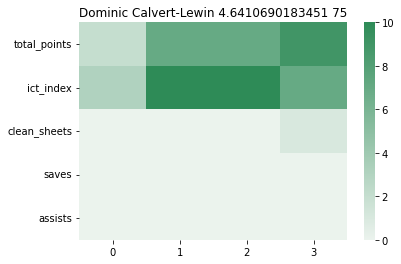

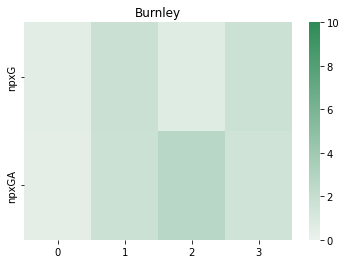

Jamie Vardy


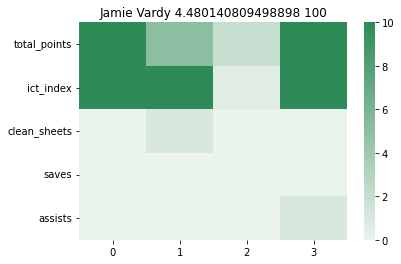

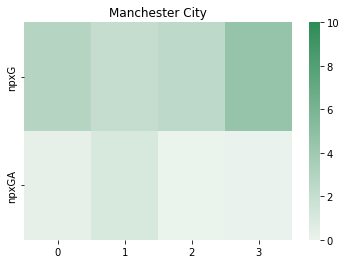

Chris Wood


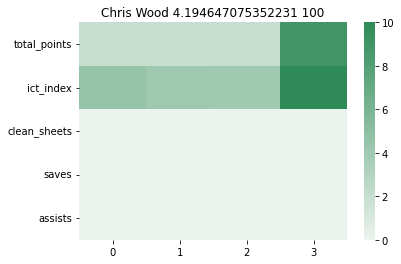

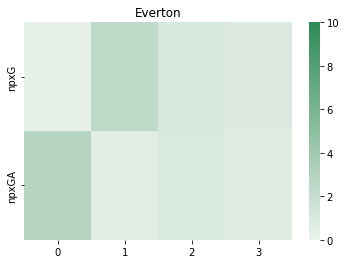

In [4]:
agent.show_top_performers(current_squad + non_squad, k=5)

In [6]:
gameweek = os.environ['GAME_WEEK']
os.system(f'cp agent.ipynb results/agent_{gameweek}.ipynb')
os.system(f'jupyter nbconvert --to html results/agent_{gameweek}.ipynb')

[NbConvertApp] Converting notebook results/agent_3_2021.ipynb to html
[NbConvertApp] Writing 1203664 bytes to results/agent_3_2021.html


0